In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import string

In [2]:
f = open("logs/data_aug/log.txt", "r") 

print(f)
Epoch=np.array([])
Loss=np.array([])
Acc=np.array([])
Lr=np.array([])
i=0
mAP=np.array([])
Rank1=np.array([])
Rank5=np.array([])
Rank10=np.array([])


for line in f:
        if "mAP" in line:
            word= line.split(' ')
            i=+1
            MAP=float(word[5][:-2])
            mAP=np.append(mAP,MAP)
            
        elif "Rank-1 " in line:
            word= line.split(' ')
            i=+1
            rank1=float(word[8][1:-2])
            Rank1=np.append(Rank1,rank1)
        elif "Rank-5 " in line:
            #print(line)
            word= line.split(' ')
            i=+1
            #print(word[8][1:-2])
            rank5=float(word[8][1:-2])
            Rank5=np.append(Rank5,rank5)
            
        elif "Rank-10 " in line:
            #print(line)
            word= line.split(' ')
            i=+1
            #print(word[7][1:-2])
            rank10=float(word[7][1:-2])
            Rank10=np.append(Rank10,rank10) 
    
        elif "Acc" in line:
            #print(line)
            word= line.split(' ')
            i=+1
            acc=float(word[9][:-1])
            Acc=np.append(Acc,acc)
            
            loss=float(word[7][:-1])
            Loss=np.append(Loss,loss)
            
            lr=float(word[12])
            Lr=np.append(Lr,lr)
            
            #print(word[4][6:-1])

            Epoch = np.append(Epoch,word[4][6:-1])

<_io.TextIOWrapper name='logs/data_aug/log.txt' mode='r' encoding='UTF-8'>


In [3]:
print(Lr.shape)
print(np.max(Acc))


print(Epoch)
print(mAP)

(1200,)
0.998
['1' '1' '1' ... '120' '120' '120']
[22.8 25.7 37.2 41.2 43.  43.3 43.7 43.8]


In [4]:

simulation1 = np.array([Epoch, Lr, Acc, Loss])
print(simulation1.shape)
path='./logs/data_aug/simulation.npy'
np.save(path,simulation1.astype(np.float))

(4, 1200)


In [5]:

cars=np.load('./logs/cars/simulation.npy')
cars=np.asarray(cars)

simulation=np.load('./logs/simulation1/simulation.npy')
simulation=np.asarray(simulation)


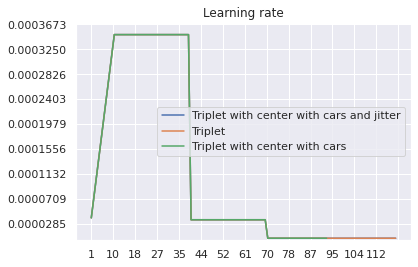

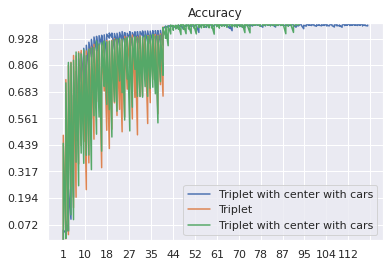

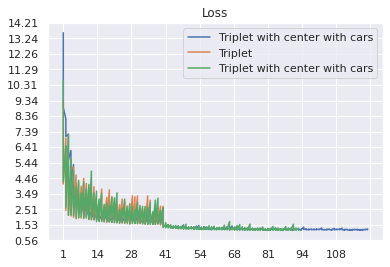

In [11]:
import seaborn as sns

sns.set()

plt.title('Learning rate')
plt.plot(Epoch,Lr,label='Triplet with center with cars and jitter')
plt.plot(simulation1[0][:],simulation1[1][:].astype(np.float),label='Triplet')
plt.plot(cars[0][:]-1,cars[1][:].astype(np.float),label='Triplet with center with cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,15))
ax.set_ylim((0,0.00037))

plt.figure()
plt.title('Accuracy')
plt.plot(Epoch,Acc,label='Triplet with center with cars')
plt.plot(simulation[0][:]-1,simulation[2][:],label='Triplet')
plt.plot(cars[0][:]-1,cars[2][:],label='Triplet with center with cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,15))
ax.set_ylim((0,1))

plt.figure()
plt.title('Loss')
plt.plot(Epoch,Loss,label='Triplet with center with cars')
plt.plot(simulation[0][:]-1,simulation[3][:],label='Triplet')
plt.plot(cars[0][:]-1,cars[3][:],label='Triplet with center with cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,15))
ax.set_xticks(np.linspace(0,120,10))

[ 15.  30.  45.  60.  75.  90. 105. 120.]


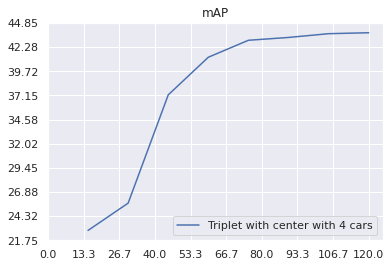

In [14]:
plt.figure()
plt.title('mAP')
x=np.linspace(15,120,8)
print(x)
plt.plot(x,mAP,label='Triplet with center with 4 cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,10))

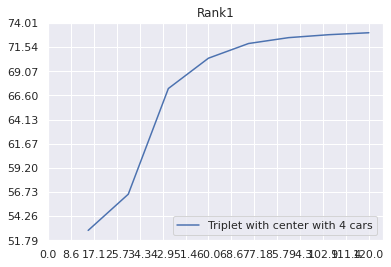

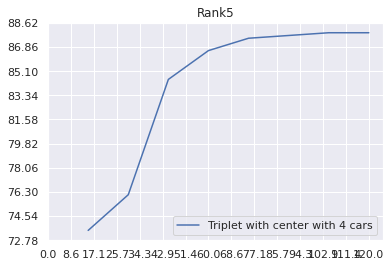

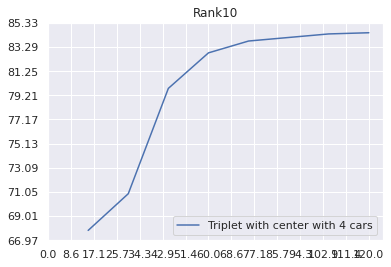

In [13]:
plt.figure()
plt.title('Rank1')
plt.plot(x,Rank1,label='Triplet with center with 4 cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,15))


plt.figure()
plt.title('Rank5')
plt.plot(x,Rank10,label='Triplet with center with 4 cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,15))


plt.figure()
plt.title('Rank10')
plt.plot(x,Rank5,label='Triplet with center with 4 cars')
plt.legend()
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.linspace(ymin,ymax,10))
ax.set_xticks(np.linspace(0,120,15))